## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [40]:
# --- Import the required modules:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
# --- Import the CSV file data into a panda dataframe:
df = pd.read_csv("source-data.csv")

# --- Set pandas to show only two digits after the decimal:
pd.options.display.float_format = '{:,.2f}'.format

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head(n=5)

In [ ]:
df.tail(n=5)

**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby('TagName').sum()

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
df.groupby('TagName').count()

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
# --- Show the date column entry 1
# --- Note: The datatype for each entry is string rather than date.
df['m'][1]

# --- df.m[1] also works.

In [19]:
# --- Change the datatype of the date column to a pandas timestamp:
df['m'] = pd.to_datetime(df['m'])

In [ ]:
# --- Show the first 10 rows:
df.head(n=5)
# type(df['m'][1])
# --- The date column entries are now just the date

## Data Manipulation



In [ ]:
# --- Pivot the dataframe so that there is one row per date and a column for each language:
reshaped_df = df.pivot(index="m", columns="TagName", values="Unnamed: 2")

# --- Replace NaN with 0 (inplace will do it to the existing dataframe so you don't need to define a new/existing variable):
reshaped_df.fillna(0, inplace=True) 

# --- Check to see if there are any remaining NaN values (should return False):
reshaped_df.isna().values.any()

# reshaped_df

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df.shape

In [ ]:
reshaped_df.columns

In [ ]:
reshaped_df.head(n=5)

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
reshaped_df.count()

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(reshaped_df.index, "java", data=reshaped_df)
plt.plot(reshaped_df.index, "php", data=reshaped_df)
plt.plot(reshaped_df.index, "python", data=reshaped_df)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.ylim(0, 35000)
plt.legend()
plt.suptitle("Java, PHP and Python", fontsize=14)

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

In [ ]:
# --- Show all the languages in a single line chart:
# --- Setup the chart layout:
plt.figure(figsize=(8,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.ylim(0, 35000)
plt.suptitle("All Programming Languages 2008 - 2020", fontsize=14)

# --- Loop through each column:
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)

# --- Add the legend:
plt.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(reshaped_df.index, "php", data=reshaped_df)
plt.plot(reshaped_df.index, "python", data=reshaped_df)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.ylim(0, 35000)
plt.legend()
plt.suptitle("PHP and Python", fontsize=14)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [114]:
# --- Use rolling and mean to use samples every x (3, 6 or 12 for example).
# --- It results in different chart accuracies as they are different point intervals.
# --- This is called a rolling mean:
roll_df = reshaped_df.rolling(window=3).mean()

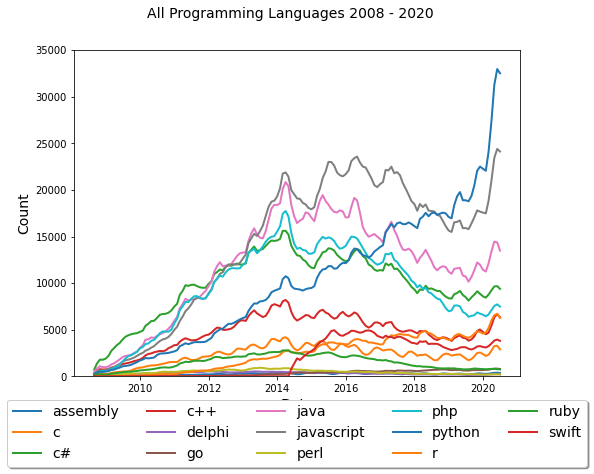

In [115]:
# --- Show all the languages in a single line chart:
# --- Setup the chart layout:
plt.figure(figsize=(8,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.ylim(0, 35000)
plt.suptitle("All Programming Languages 2008 - 2020", fontsize=14)

# --- Loop through each column:
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=2, label=roll_df[column].name)

# --- Add the legend:
plt.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)